<a href="https://colab.research.google.com/github/dandamudi-geeta/Advance-Data-Analytics/blob/main/2348512_ImageFiltering(ADA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from scipy.stats import mode

In [ ]:
mnist = fetch_openml('mnist_784',version=1)
X, y = mnist.data, mnist.target.astype(int)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#standardize
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [ ]:
#reduce dimensionality
pca=PCA(n_components=50)
X_pca=pca.fit_transform(X_scaled)

In [ ]:
#apply kmeans
n_clusters=10
kmeans=KMeans(n_clusters=n_clusters,random_state=42)
kmeans.fit(X_pca)
clusters= kmeans.predict(X_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
#map cluster

labels=np.zeros_like(clusters)
for i in range(n_clusters):
    mask=(clusters==i)
    labels[mask]=mode(y[mask])[0]

In [ ]:
#calculate accuracy

accuracy=accuracy_score(y,labels)
print(accuracy)
print(f'Clustering accuracy:{accuracy* 100:.2f}%')

0.5273857142857142
Clustering accuracy:52.74%


In [ ]:
#visualize clusters

def plot_digits(data,clusters, num_images=10):
  fig,axes=plt.subplots(num_images,n_clusters,figsize=(n_clusters,num_images))
  for i in range(num_images):
    for j in range(n_clusters):
     axes[i,j].imshow(data[clusters == j][i].reshape(28,28),cmap='gray')
     axes[i,j].axis('off')

plt.show()

In [ ]:
plt.show()

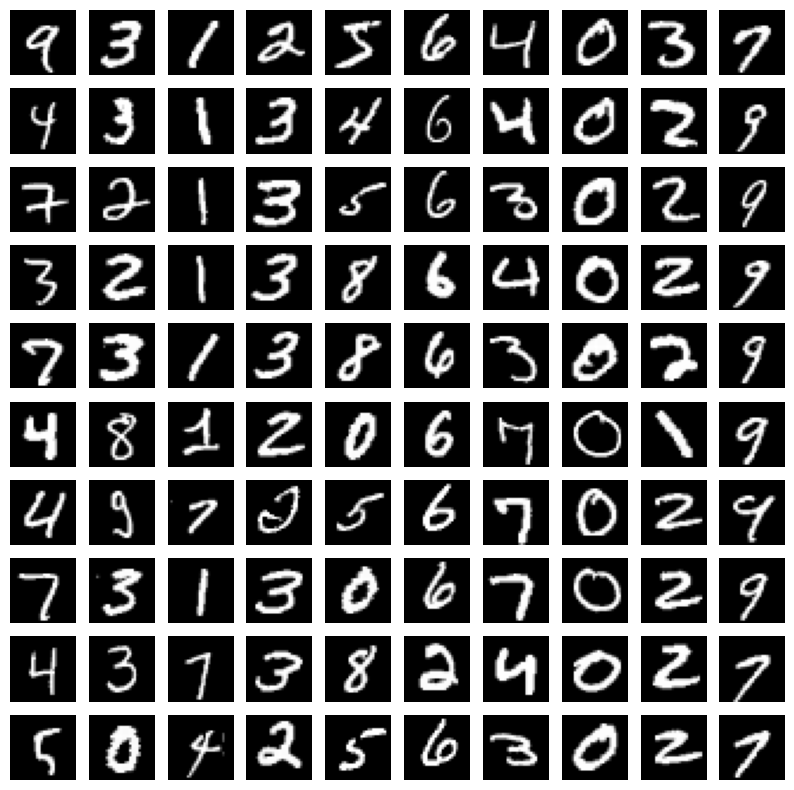

In [ ]:
plot_digits(X.values, clusters)

In [ ]:
X, y = mnist.data, mnist.target.astype(int)

Text(0.5, 1.0, 'First 2 Principle Components')

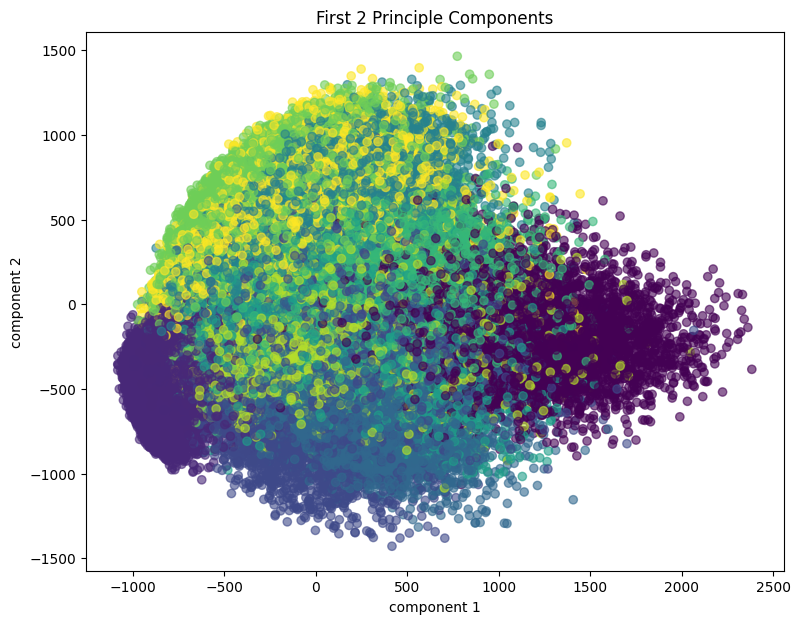

In [ ]:

#graphing it
pca = PCA(n_components = 2)
data_pca = pca.fit_transform(X)

f, ax = plt.subplots(figsize = (9,7))
plt.scatter(data_pca[:, 0], data_pca[:, 1],
            c=y, edgecolor='face', alpha=0.6)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.title('First 2 Principle Components')